# Finite elements

## Background / context
* In the finite element method the domain of interest $\Omega$ is *triangulated*, i.e. decomposed into simple *elements*
* The purpose of this decomposition is:
    1. to find *local* function spaces 
    2. and glue them together afterwards to meet regularity requirements (typically: continuity)
* In this unit we will concentrate on the first step: *local* function spaces

<img src="../graphics/mesh3D_one_element.png" height=160 /> <img src="../graphics/mesh2D_one_element.png" height=160 />

The local-to-global connection is later on formed through the association of *degrees of freedom* (dofs) to the geometrical entities of the mesh, e.g. the vertices, edges, faces, cells, etc..

Example idea:
* put a dof to each vertex: you have as many dofs as vertices **globally**
* **locally** you have as many dofs as vertices in the element
* every dof only appears in as many elements as elements are connected to the vertex

This however requires that the basis functions associated to the dofs are *local* in the sense that they vanish on elements that do not contain the dof.

## Finite elements
We distinguish two characterizations of finite elements. 

### Finite elements in the classical sense (Ciarlet)
Finite elements in the classical sense consist of a triple $(T,V_T,\Psi^T)$ of:
 * a domain of definition (e.g. a triangle) $T$
 * a finite dimensional functions space $V_T: T \to \mathbb{R}$, $\operatorname{dim}(V_T) = n_T$
 * a set of $n_T$ linearly independent functionals that describe the degrees of freedom $\Psi^T = \{\Psi^T_i\}_{i=1,..,n_T}$, $\quad\Psi^T_i: V_T \to \mathbb{R}, i =1,..,n_T$.

### Finite elements from an implementational point of view
In practice the finite element is often defined through:
 * a domain of definition (e.g. a triangle) $T$
 * a set of basis functions $ \{ \phi^T_i \}_{i=1,..,n_T} $

Note that then obviously $V_T = \operatorname{span}(\{\phi^T_i\})$.

Often, both characterizations are known and match. 
Otherwise the basis functions can be constructed as the *dual* to the functionals, so that $\Psi^T_i(\phi_j) = \delta_{ij}$ 

Note: $\Psi^T_i(\phi_j) = \delta_{ij}$ is nice, but is not necessary!

## Examples (1D)

### Example: `P1(Segment)`
FE triple $(T,V_T,\Psi^T)$:
* domain: line segment $T = [0,1]$ ("unit interval")
* Linear functions on the  $[0,1]$: $V_T = \mathcal{P}^1(T) = \{f(x) = a + bx\}$
* `dofs` associated with the vertices $0$ and $1$: $\Psi^T_0(v) = v(0)$, $\Psi^T_1(v) = v(1)$

Dual basis:
* $\phi_0 = 1-x$, $\qquad$ ($\phi_0(0)=1$, $\phi_0(1)=0$)
* $\phi_1 = x$, $\qquad$ ($\phi_1(0)=0$, $\phi_1(1)=1$)


source module for methodsNM imported.


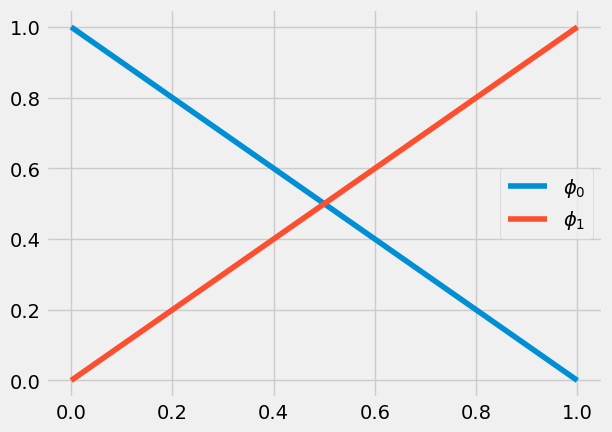

In [1]:
import import_hack
from methodsnm.fe_1d import P1_Segment_FE
from methodsnm.visualize import DrawSegmentFE
p1 = P1_Segment_FE()
DrawSegmentFE(p1)

-> [Implementation](../src/fe.py)

### Example: `P1(Segment)*` (different `dofs`/functionals)

* domain: line segment $T = [0,1]$ ("unit interval")
* Linear functions on the  $[0,1]$: $V_T = \mathcal{P}^1(T) = \{f(x) = a + bx\}$
* `dofs` associated with the vertices $0$ and $1$: $\Psi^T_0(v) = \int_0^1 v(x) dx$, $\Psi^T_1(v) = \int_0^1 x v(x) dx$

$\leadsto$ different dual basis:
* $\phi_0(x) = 3-2x$, $\qquad$ ($\Psi^T_0(\phi_0)=1$, $\Psi^T_0(\phi_0)=0$)
* $\phi_1(x) = 6-6x$, $\qquad$ ($\Psi^T_0(\phi_1)=0$, $\Psi^T_0(\phi_1)=1$)

### Example: `Lagrange(Segment)` (Lagrange polynomials of order $k$)
* domain: line segment $T = [0,1]$ ("unit interval")
* polynomial functions on the  $[0,1]$: $V_T = \mathcal{P}^k(T) = \{ \sum_{l=0}^k a_k x^k \mid a \in \mathbb{R}^{k+1}\}$
* `dofs` associated to different nodes $x_j \in [0,1]$: $\Psi^T_j(v) = v(x_j)$, $j=0,..,k$

### Why different sets of `dofs` / functionals?

* local $\leftrightarrow$ global: Functionals (`dofs`) may be shared
    * Often `dofs` are associated to geometrical entities (e.g. vertices in 1D)
    * Then $\Psi^T_{p,i}(\phi^T_{q,j}) = 0$ for $p\neq q$ where $p,q$ are different geometrical entities is necessary ($\leadsto$ 2D)
* if no global constraints are imposed, other properties may be benefitial, e.g. efficient/stable evaluation, orthogonality, ..

### **Tasks** $\leadsto$ [fe.py](../src/methodsnm/fe.py), [fe_1d.py](../src/methodsnm/fe_1d.py), [visualize.py](../src/methodsnm/visualize.py)

#### Task `FE1D`-1.
Implement a finite element (inherited from `FE`) for $V_T = \mathcal{P}^2([0,1])$ with $\Psi^T_0(v)=v(0)$, $\Psi^T_1(v)=v(1)$ and $\Psi^T_2(v)=\int_0^1 v dx$.
The corresponding basis does not need to be *dual*, but we ask for $\Psi^T_0(\phi_j)=\delta_{0j}$, $\Psi^T_1(\phi_j)=\delta_{1j}$
* First, develop a corresponding basis on paper
* Then, put the implementation of the new finite element (named e.g. `P1Mod_Segment`) in `fe_1d.py`
* Draw the basis functions in this notebook, e.g. with the following code snippet

In [2]:
#from methodsnm.fe_1d import P1Mod_Segment_FE
#p1m = P1Mod_Segment_FE()
#DrawSegmentFE(p1m)

#### Task `FE1D`-2. 
Complete the implementation of `Lagrange_Segment_FE` in `fe_1d.py` and Draw the corresponding basis functions for order $5$. Choose equidistant points for testing (default).
* Come up with an evaluation formula that works for arbitrary orders $k$
* Replace the function `evaluate` in the `Lagrange_Segment_FE` class

Note that the default filling of the `nodes` values is already implemented.

In [3]:
from methodsnm.fe_1d import Lagrange_Segment_FE
lag = Lagrange_Segment_FE(order=5)
print(lag)
#DrawSegmentFE(lag)

Lagrange Segment Finite Element(order=5)
Lagrange-FE-obj(order=5,nodes=6)


This task should fix the tests in [test_fe_1d.py](../tests/test_fe_1d.py).

#### Task `FE1D`-3.
Implement a [Legendre FE basis](https://en.wikipedia.org/wiki/Legendre_polynomials) $\{\ell_i(x)\}_{i=0,..,k}$ for arbitrary order $k$. Legendre polynomials form an orthogonal basis of $\mathcal{P}^k([-1,1])$ w.r.t. to the $L^2([-1,1])$ inner product with $\int_{-1}^1 \ell_i(x) \ell_j(x) ~ dx = \delta_{ij} \frac{2}{2i+1}$. A finite element can be defined through:
* domain: line segment $T = [-1,1]$ ("centered unit interval")
* polynomial functions on $[-1,1]$: $V_T = \mathcal{P}^k(T) = \{ \sum_{l=0}^k a_k x^k \mid a \in \mathbb{R}^{k+1}\}$
* `dofs` associated to different **modes** based on the Legendre basis itself: $\Psi^T_j(v) = \int_{-1}^1 v(x) \ell_j(x) ~ dx ~\cdot (j+\frac12)$, $j=0,..,k$, s.t. $\Psi^T_j(\ell_i) = \delta_{ij}$

There holds the following important characterization that simplifies the efficient implementation of the Legendre polynomials:
* $\ell_0(x) = 1$
* $\ell_1(x) = x$
* and the recurrence relation for $n > 1$:
    $$
    (n+1) \ell_{n+1}(x) = (2 n + 1) x \ell_{n}(x) - n \ell_{n-1}(x)
    $$

An implementation based on the recursion is easy when based on `RecursivePolynomial`s in [recpol.py](../src/methodsnm/recpol.py).

Note that when implementing the Legendre FE basis you need to apply an affine transformation between $[0,1]$ and $[-1,1]$.

* What are major advantages and disadvantages of the Legendre basis compared to the Lagrange basis?

----

## Examples (2D)

### Example: `P1(Triangle)`
<img src="../graphics/seq_P1.png" height=160 />

FE triple $(T,V_T,\Psi^T)$:
* domain: Triangle $T = \hat T = \operatorname{conv}((0,0),(1,0),(0,1))$ ("unit triangle")
* Linear functions on the  $T = \hat T$: $V_T = \mathcal{P}^1(T) = \{f(\mathbf{x}) = a + b~x_1 + c~x_2\}$, $\mathbf{x} = (x_1,x_2)$
* `dofs` associated with the vertices at $v_0=(0,0)$, $v_1=(1,0)$ and $v_2=(0,1)$: $\Psi^T_i(w) = w(v_i)$, $i=0,1,2$

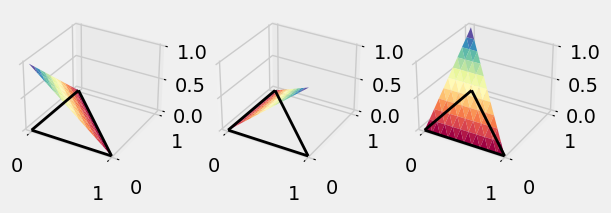

In [4]:
#%matplotlib qt
from methodsnm.fe_2d import P1_Triangle_FE
from methodsnm.visualize import DrawTriangleFE
p1 = P1_Triangle_FE()
DrawTriangleFE(p1)

### Example: `Lagrange_P2(Triangle)`
<img src="../graphics/seq_P2.png" height=160 />

FE triple $(T,V_T,\Psi^T)$:
* domain: Triangle $T = \hat T = \operatorname{conv}((0,0),(1,0),(0,1))$ ("unit triangle")
* Linear functions on the  $T = \hat T$: $V_T = \mathcal{P}^2(T) = \{f(\mathbf{x}) = \displaystyle \sum_{\substack{i,j=0\\ i+j \leq 2}} a_{ij} ~ x_1^i ~ x_2^j \mid a_{ij} \in \mathbb{R} \}$, $\mathbf{x} = (x_1,x_2)$
* `dofs` associated with the vertices and the edge midpoints, $v_0$, $v_1$, $v_2$, $e_0 = (0.5,0.5)$, $e_1 = (0,0.5)$ and $e_2 = (0.5,0)$: 
    * vertex dofs: $\Psi^T_i(w) = w(v_i)$, $i=0,1,2$
    * edge dofs: $\Psi^T_i(w) = w(e_{i-3})$, $i=3,4,5$

Note: we number the edges so that edge $i$ is opposite to vertex $i$, i.e. vertex $i$ and vertex $j$ defined edge $3-i-j$.

### ***Tasks*** $\leadsto$ [fe.py](../src/methodsnm/fe.py), [fe_2d.py](../src/methodsnm/fe_2d.py), [visualize.py](../src/methodsnm/visualize.py)

#### `FE2D`-1

Implement the `Lagrange_P2(Triangle)` finite element in `fe_2d.py` and draw the basis functions.
* Come up with an evaluation formula for the six basis function.
* You may want to make use of the [barycentric coordinates](https://en.wikipedia.org/wiki/Barycentric_coordinate_system) of the triangle $\lambda_0(\mathbf{x}) = 1 - x_1 - x_2$, $\lambda_1(\mathbf{x}) = x_1 $, $\lambda_2(\mathbf{x}) = x_2$. Where do the barycentric coordinates vanish?
* Implement the `evaluate`-function in the `P2_Triangle_FE` class in `fe_2d.py`
* Draw the basis functions in this notebook, e.g. with the following code snippet

In [5]:
#from methodsnm.fe_2d import P2_Triangle_FE
#p2 = P2_Triangle_FE()
#DrawTriangleFE(p2,sampling=20)

## Note:
We will come back to finite element (implementations) later again.